Importando os pacotes


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [7]:
# Vamos ler a base de dados.

sinasc_RO_2019 = pd.read_csv("/content/sinasc_RO_2019.csv")


In [8]:
print(sinasc_RO_2019.shape)
sinasc_RO_2019.head()


(27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

**Podemos montar os gráficos todos juntos dessa forma: Mas eu não gostei desse modo porque os gráficos ficam se sobrepondo e não é a melhor forma de visualizar**

plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(3, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.2)

sns.countplot(ax = axes[0, 0], x='APGAR1', data=sinasc_RO_2019)

sns.countplot(ax = axes[0, 1], x='APGAR5', data=sinasc_RO_2019)

sns.countplot(ax = axes[1, 0], x='SEXO', data=sinasc_RO_2019)

sns.countplot(ax = axes[1, 1], x='ESTCIVMAE', data=sinasc_RO_2019)

sns.countplot(ax = axes[2, 0], x='GESTACAO', data=sinasc_RO_2019)

plt.show()

**Por isso resolvi colocar os gráfico um por vez para facilitar a visualização**

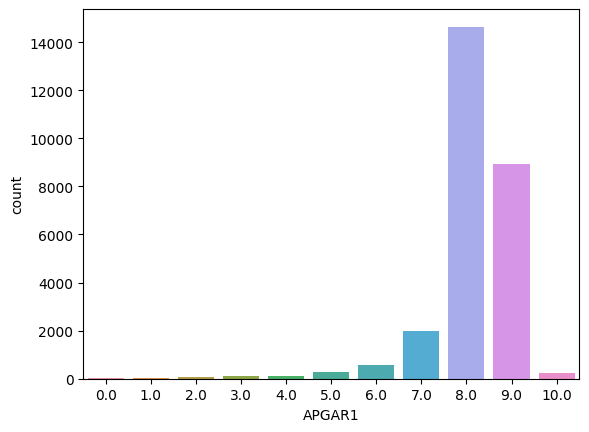

In [9]:
sns.countplot(x="APGAR1", data=sinasc_RO_2019)
plt.show()

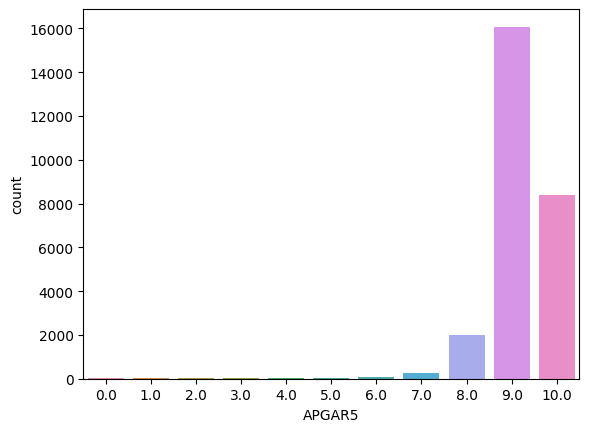

In [10]:
sns.countplot(x="APGAR5", data=sinasc_RO_2019)
plt.show()

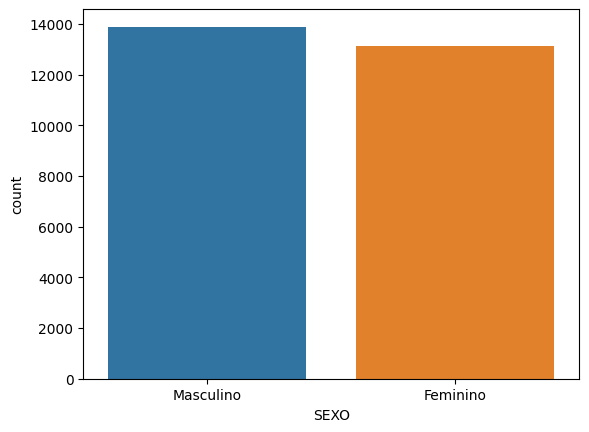

In [11]:
sns.countplot(x="SEXO", data=sinasc_RO_2019)
plt.show()

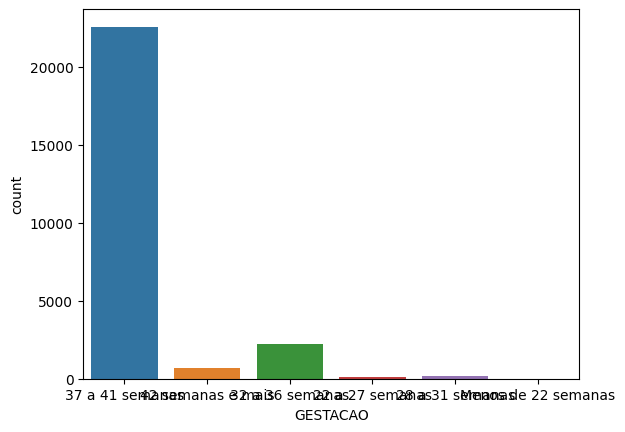

In [12]:
sns.countplot(x="GESTACAO", data=sinasc_RO_2019)
plt.show()

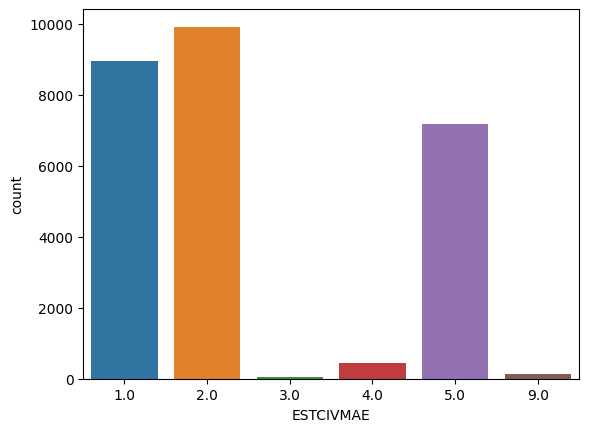

In [13]:
sns.countplot(x="ESTCIVMAE", data=sinasc_RO_2019)
plt.show()

####  3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [14]:
# Vamos cálcular primeiro os valores médios para cada valor de consultas

apgar5_medio = sinasc_RO_2019.groupby("CONSULTAS")["APGAR5"].mean()
# Isso vai criar uma série com os valores médios do APGAR5 para cada número de consultas. Depois, você pode usar a função sns.barplot para fazer um gráfico de barras com essa série.



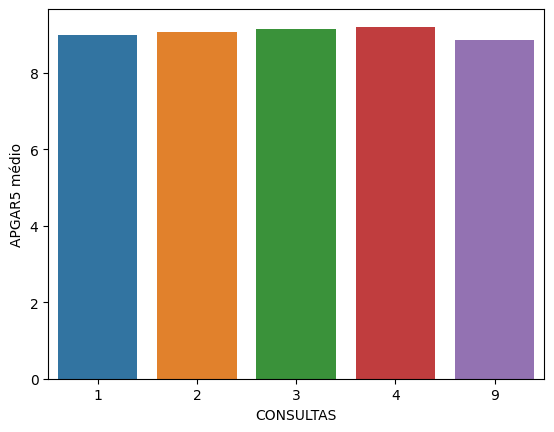

In [15]:
# Agora basta plotar o gráfico com o sns. Colocamos o eixo x como CONSULTAS e o eixo y como "APGAR5 médio".

sns.barplot(x=apgar5_medio.index, y=apgar5_medio.values)
plt.xlabel("CONSULTAS")
plt.ylabel("APGAR5 médio")
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<Axes: xlabel='CONSULTAS', ylabel='APGAR5'>

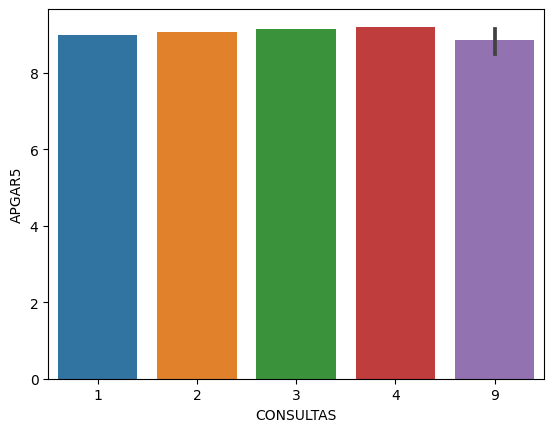

In [21]:
# poderiamos criar o gráfico dessa forma simplificada
from numpy import mean

sns.barplot(x='CONSULTAS', y='APGAR5', data=sinasc_RO_2019, estimator=mean)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<Axes: title={'center': 'CONSULTAS'}>

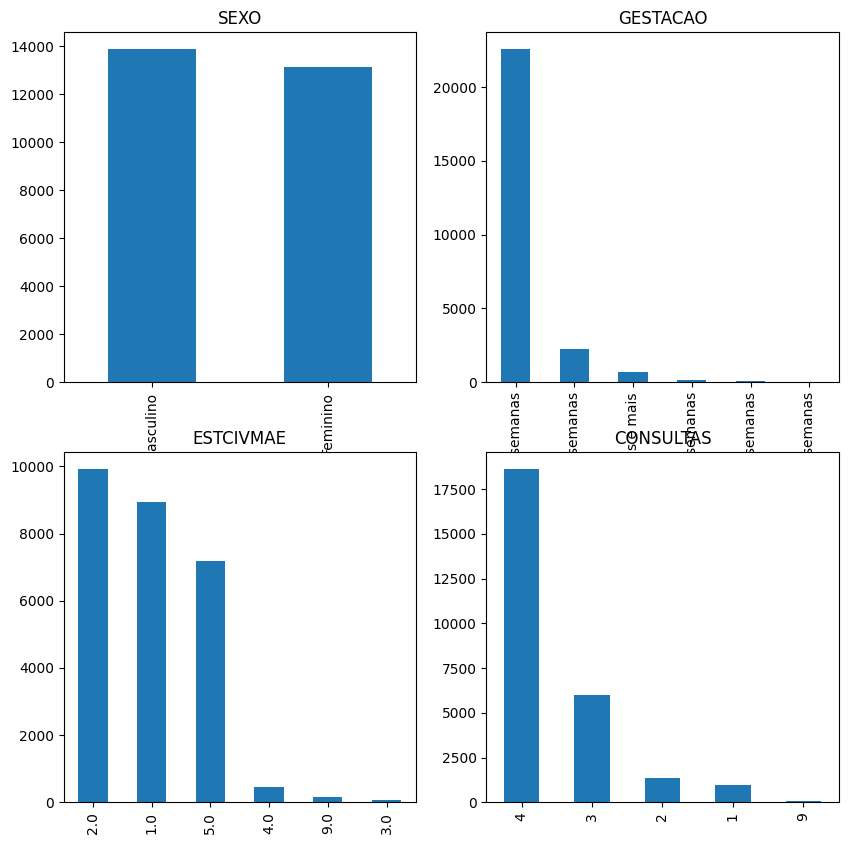

In [19]:
# Para craiar figuras de 4 plotes criamos uma matriz de 2 por 2 a qual gera 4 posições
fig, axes = plt.subplots(2, 2, figsize=(10, 10))


# Vamos plotar os graficos de cada coluna pedida

sinasc_RO_2019["SEXO"].value_counts().plot.bar(ax=axes[0, 0], title="SEXO")
sinasc_RO_2019["GESTACAO"].value_counts().plot.bar(ax=axes[0, 1], title="GESTACAO")
sinasc_RO_2019["ESTCIVMAE"].value_counts().plot.bar(ax=axes[1, 0], title="ESTCIVMAE")
sinasc_RO_2019["CONSULTAS"].value_counts().plot.bar(ax=axes[1, 1], title="CONSULTAS")